# Loop over all 250 "10B" legs of helicopter fast data
#### Brian Mapes, October 4, 2024
#### Goal: understand basic character of instruments and data 

In [1]:
# Packages and open datafile

import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp 
import numpy as np 
from scipy import signal

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


In [2]:
from glob import glob
files1 = glob('/Users/bmapes/OneDrive_UM/FileTransfer/10B_Legs/Sensor1/*.csv', recursive=True)
files2 = glob('/Users/bmapes/OneDrive_UM/FileTransfer/10B_Legs/Sensor2/*.csv', recursive=True)

files1 = np.sort(files1)
files2 = np.sort(files2)

In [3]:
# Multipage PDF file https://gist.github.com/thanasi/7e08bc41e6a085cd2140

from matplotlib.backends.backend_pdf import PdfPages

# One file as a quick look 

In [4]:
file = files1[0]

df = pd.read_csv(file, low_memory=False, skiprows=0)
pd.options.display.max_columns = None  # unlimited column display
df.drop([0,1], inplace=True)  # First two rows are units string and something else 
df.index = pd.np.arangeIndex(0, df.shape[0])  # new index from 0 after discarding those two rows 
df

,Timestamp,latitude,longitude,course,speed,altitude,Ux1,Uy1,Uz1,Ts1,CO21,H2O1,cell_tmpr1,cell_press1
0,2023-06-15T10:11:00.100,25.602333,-80.201667,105.1,29.066086,1.6,28.02220,-1.253327,2.895432,306.71865,0.000681,0.017767,302.67670,101527.2
1,2023-06-15T10:11:00.150,25.602333,-80.201667,105.1,29.066086,1.6,28.10233,-1.212588,2.610832,306.69489,0.000680,0.017634,302.67670,101527.2
2,2023-06-15T10:11:00.200,25.602333,-80.201667,105.1,29.066086,1.6,27.97811,-1.367255,2.590745,306.50616,0.000678,0.017460,302.67670,101527.2
3,2023-06-15T10:11:00.250,25.602333,-80.201667,105.1,29.066086,1.6,28.40587,-1.508813,2.525322,306.60340,0.000680,0.018075,302.67670,101527.2
4,2023-06-15T10:11:00.300,25.602333,-80.201667,105.1,29.066086,1.6,27.94525,-1.385754,2.784731,306.78651,0.000679,0.017849,302.67670,101527.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10779,2023-06-15T10:19:59.800,25.665833,-80.052667,66.9,30.969529,6.8,27.69857,-2.782887,1.749015,306.78449,0.000682,0.017143,302.30112,101491.5
10780,2023-06-15T10:19:59.850,25.665833,-80.052667,66.9,30.969529,6.8,26.50185,-3.365909,2.205830,305.88585,0.000682,0.017638,302.30112,101491.5
10781,2023-06-15T10:19:59.900,25.665833,-80.052667,66.9,30.969529,6.8,27.02139,-2.862267,2.282202,306.50856,0.000680,0.017479,302.30112,101491.5
10782,2023-06-15T10:19:59.950,25.665833,-80.052667,66.9,30.969529,6.8,26.67238,-2.885961,2.627112,306.65853,0.000680,0.018159,302.30112,101491.5


In [5]:
# Summary stats 
df.describe()

,latitude,longitude,course,speed,altitude,Ux1,Uy1,Uz1,Ts1,CO21,H2O1,cell_tmpr1,cell_press1
count,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000,10784.000000
mean,25.634741,-80.127165,65.003375,30.793495,3.629785,26.498982,-3.493813,2.059683,306.479014,0.000678,0.017366,302.435671,101497.420605
std,0.019160,0.043023,5.342781,0.772312,1.950608,0.882992,0.865030,0.329463,0.267748,0.000003,0.000469,0.120145,16.736129
min,25.602167,-80.201667,59.000000,28.294420,0.100000,23.126040,-6.341722,0.456865,305.057490,0.000669,0.016251,302.265330,101441.100000
25%,25.618500,-80.164667,62.300000,30.557974,2.000000,25.945465,-4.123903,1.832407,306.305610,0.000677,0.017012,302.317140,101487.700000
50%,25.634667,-80.127067,63.800000,31.020973,3.700000,26.557625,-3.544974,2.040348,306.466960,0.000678,0.017300,302.410100,101498.300000
75%,25.652167,-80.090100,65.600000,31.329640,5.100000,27.113307,-2.945674,2.267641,306.644175,0.000680,0.017668,302.542910,101508.100000
max,25.665833,-80.052667,105.100000,31.844084,8.500000,29.235990,-0.284793,3.506580,307.535880,0.000688,0.019473,302.676700,101560.100000


# Quick plots for all legs, one PDF file's page per file 

In [ ]:
# both sensors, 10B dataset raw 
with PdfPages('/Users/bmapes/OneDrive_UM/FileTransfer/10B_Legs/Quickplots.6Sensors.allflights.pdf') as pdf:

    for i,file in enumerate(files2):
# open both files, there are the same number for both sensors 
        file1 = files1[i]
        file2 = files2[i]
        print(file1, file2)

        df1 = pd.read_csv(file1, low_memory=False, skiprows=0)
        df1.drop([0,1], inplace=True)  # First two rows are units string and something else 
        df2 = pd.read_csv(file2, low_memory=False, skiprows=0)
        df2.drop([0,1], inplace=True)  # First two rows are units string and something else 
         
        plt.figure( figsize=(10,10) )
        plt.suptitle(file)
        
        plt.subplot(321)
        df1["Uz1"].plot()
        df2["Uz2"].plot()
        plt.title('Uz or w');
        
        plt.subplot(322)
        df1["Ux1"].plot()
        df2["Ux2"].plot()
        plt.title('Ux ');
        
        plt.subplot(323)
        df1["Uy1"].plot()
        df2["Uy2"].plot()
        plt.title('Uy ');
        
        plt.subplot(324)
        df1["Ts1"].plot()
        df2["Ts2"].plot()
        plt.title('Ts ');

        plt.subplot(325)
        df1["H2O1"].plot()
        df2["H2O2"].plot()
        plt.title('H2O ');

        plt.subplot(326)
        df1["CO21"].plot()
        df2["CO22"].plot()
        plt.title('CO2 ');

        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

#pdf.close()
print('done')

In [ ]:
# both sensors, detrended 10B dataset 
with PdfPages('/Users/bmapes/OneDrive_UM/FileTransfer/10B_Legs/Quickplots.detrended.allflights.pdf') as pdf:

    for i,file in enumerate(files2):
# open both files, there are the same number for both sensors 
        file1 = files1[i]
        file2 = files2[i]
        print(file1, file2)

        df1 = pd.read_csv(file1, low_memory=False, skiprows=0)
        df1.drop([0,1], inplace=True)  # First two rows are units string and something else 
        df2 = pd.read_csv(file2, low_memory=False, skiprows=0)
        df2.drop([0,1], inplace=True)  # First two rows are units string and something else 

        # Perturbations of u,v,w,T' and detrend also 
        df1["Uz1'"] = signal.detrend(df1['Uz1']-df1['Uz1'].mean())
        df2["Uz2'"] = signal.detrend(df2['Uz2']-df2['Uz2'].mean())
        df1["Ux1'"] = signal.detrend(df1['Ux1']-df1['Ux1'].mean())
        df2["Ux2'"] = signal.detrend(df2['Ux2']-df2['Ux2'].mean())
        df1["Uy1'"] = signal.detrend(df1['Uy1']-df1['Uy1'].mean())
        df2["Uy2'"] = signal.detrend(df2['Uy2']-df2['Uy2'].mean())
        df1["Ts1'"] = signal.detrend(df1['Ts1']-df1['Ts1'].mean())
        df2["Ts2'"] = signal.detrend(df2['Ts2']-df2['Ts2'].mean())
        df1["qv1'"] = signal.detrend(df1['H2O1']-df1['H2O1'].mean())   # qv is H2O mixing ratio 
        df2["qv2'"] = signal.detrend(df2['H2O2']-df2['H2O2'].mean())
        df1["CO21'"] = signal.detrend(df1['CO21']-df1['CO21'].mean())
        df2["CO22'"] = signal.detrend(df2['CO22']-df2['CO22'].mean())

        plt.figure( figsize=(10,10) )
        plt.suptitle(file)

        plt.subplot(321)
        df1["Uz1'"].plot()
        df2["Uz2'"].plot()
        plt.title('Uz or w detrended perturbation');
        
        plt.subplot(322)
        df1["Ux1'"].plot()
        df2["Ux2'"].plot()
        plt.title('Ux ');
        
        plt.subplot(323)
        df1["Uy1'"].plot()
        df2["Uy2'"].plot()
        plt.title('Uy ');
        
        plt.subplot(324)
        df1["Ts1'"].plot()
        df2["Ts2'"].plot()
        plt.title('Ts ');

        plt.subplot(325)
        df1["qv1'"].plot()
        df2["qv2'"].plot()
        plt.title('H2O aka qv');

        plt.subplot(326)
        df1["CO21'"].plot()
        df2["CO22'"].plot()
        plt.title('CO2 ');
        
        pdf.savefig()  # saves the current figure into a pdf page
        plt.close()

#pdf.close()
print('done')

array([ 0,  2,  4,  6,  8, 10, 12, 14, 16, 18])

# Fourier transform and ogives (cumulative variance by frequency)

In [ ]:
# both sensors cumulative spectra, cumulate high to low so total variance is on left axis 
with PdfPages('/Users/bmapes/OneDrive_UM/FileTransfer/10B_Legs/cumSpectra.high2low.pdf') as pdf:

    for i,file in enumerate(files1):
        file1 = files1[i]
        file2 = files2[i]
        print(file1,file2)
        
        df1 = pd.read_csv(file1, low_memory=False, skiprows=0)
        df1.drop([0,1], inplace=True)  # First two rows are units string and something else 
        df2 = pd.read_csv(file2, low_memory=False, skiprows=0)
        df2.drop([0,1], inplace=True)  # First two rows are units string and something else 

        # Perturbations of u,v,w,T' and detrend also 
        df1["Uz1'"] = signal.detrend(df1['Uz1']-df1['Uz1'].mean())
        df2["Uz2'"] = signal.detrend(df2['Uz2']-df2['Uz2'].mean())
        df1["Ux1'"] = signal.detrend(df1['Ux1']-df1['Ux1'].mean())
        df2["Ux2'"] = signal.detrend(df2['Ux2']-df2['Ux2'].mean())
        df1["Uy1'"] = signal.detrend(df1['Uy1']-df1['Uy1'].mean())
        df2["Uy2'"] = signal.detrend(df2['Uy2']-df2['Uy2'].mean())
        df1["Ts1'"] = signal.detrend(df1['Ts1']-df1['Ts1'].mean())
        df2["Ts2'"] = signal.detrend(df2['Ts2']-df2['Ts2'].mean())
        df1["qv1'"] = signal.detrend(df1['H2O1']-df1['H2O1'].mean())   # qv is H2O mixing ratio 
        df2["qv2'"] = signal.detrend(df2['H2O2']-df2['H2O2'].mean())
        df1["CO21'"] = signal.detrend(df1['CO21']-df1['CO21'].mean())
        df2["CO22'"] = signal.detrend(df2['CO22']-df2['CO22'].mean())
 
# FFT, rescale by number of values so the variance is correct 
# frequency in Hz: in long legs (100 cycles/leg) is a lower frequency in Hz 
# Need to divide freq1 by leglength to get (cycles per sample), max value will be 1/2 
# Then multiply by 20 (samples per second) to get (cycles per second) or Hz  


        freq1 = np.arange(df1.Uz1.size//2) *20./df1.Uz1.size #### Hz
        spec_w1 = np.fft.fft( df1["Uz1'"] )[0:df1.Uz1.size//2] # lazy to get size, then redo dividing by size
        spec_w1 = np.fft.fft( df1["Uz1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_u1 = np.fft.fft( df1["Ux1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_v1 = np.fft.fft( df1["Uy1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_T1 = np.fft.fft( df1["Ts1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_q1 = np.fft.fft( df1["qv1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_C1 = np.fft.fft( df1["CO21'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)

        freq2 = np.arange(df2.Uz2.size//2) *20./df2.Uz2.size #### Hz
        spec_w2 = np.fft.fft( df2["Uz2'"] )[0:df2.Uz2.size//2]
        spec_w2 = np.fft.fft( df2["Uz2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_u2 = np.fft.fft( df2["Ux2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_v2 = np.fft.fft( df2["Uy2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_T2 = np.fft.fft( df2["Ts2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_q2 = np.fft.fft( df2["qv2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_C2 = np.fft.fft( df2["CO22'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)

#        meanwspec = (spec_w1+spec_w2)/2 # different sizes, slightly, cannot average
#        meanTspec = (spec_T1+spec_T2)/2
#        meanuspec = (spec_u1+spec_u2)/2
#        meanvspec = (spec_v1+spec_v2)/2

# CUMULATIVE VARIANCE OF EACH VARIABLE, flip the order so the total is at low freq end

        fig = plt.figure( figsize=(10,10) )
        plt.suptitle(file1)

        plt.subplot(321)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_w1)**2)) ) 
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_w2)**2)) )
        plt.ylim([0,0.2])
        
        plt.ylabel('cumulative variance by frequency')
        plt.title("Cumulative variance w'w'") 
        
        plt.subplot(322)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_u1)**2)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_u2)**2)) )
        plt.ylim([0,0.4])
        
        plt.ylabel('cumulative variance by frequency')
        plt.title("Cumulative variance u'u'") 
        
        plt.subplot(323)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_v1)**2)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_v2)**2)) )
        plt.ylim([0,0.4])
        
        plt.ylabel('cumulative variance by frequency')
        plt.title("Cumulative variance v'v'") 
        
    
        plt.subplot(324)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_T1)**2)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_T2)**2)) )
        plt.ylim([0,0.1])
        
        plt.ylabel('cumulative variance by frequency')
        plt.title("Cumulative variance T'T'");

        plt.subplot(325)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_q1)**2)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_q2)**2)) )
        plt.ylim([0,2E-7])
        
        plt.xlabel('freq/ Hz in record length '+str(df2.Uz2.size))
        plt.ylabel('cumulative variance by frequency')
        plt.title("Cumulative vapor variance q'q'");
        
        plt.subplot(326)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_C1)**2)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_C2)**2)) )
        plt.ylim([0,1E-11])
        
        plt.xlabel('freq/ Hz '+str(df2.Uz2.size))
        plt.ylabel('cumulative variance by frequency')
        plt.title("Cumulative CO2 variance C'C'");

        #plt.close()
        pdf.savefig()  # saves the current figure into a pdf page

# pdf.close()
print('done with variance PDF 250 pages', i)

# Cross-spectrum products, Uz' times other
## That is, vertical eddy flux breakdown by frequency 

In [ ]:
# both sensors cumulative spectra, cumulate high to low so total variance is on left axis 
with PdfPages('/Users/bmapes/OneDrive_UM/FileTransfer/10B_Legs/cumCospectra.high2low.pdf') as pdf:

    for i,file in enumerate(files1):
        file1 = files1[i]
        file2 = files2[i]
        print(file1,file2)
        
        df1 = pd.read_csv(file1, low_memory=False, skiprows=0)
        df1.drop([0,1], inplace=True)  # First two rows are units string and something else 
        df2 = pd.read_csv(file2, low_memory=False, skiprows=0)
        df2.drop([0,1], inplace=True)  # First two rows are units string and something else 

# Containter for result of this leg, using df1 first line as first 6 columns (altitude, time, etc.)
        df = df1.iloc[[0]]
        result = df.drop(columns=df.keys().values[6:])
        
        # Perturbations of u,v,w,T' and detrend also, insert back into dataframe with a ' symbol
        df1["Uz1'"] = signal.detrend(df1['Uz1']-df1['Uz1'].mean())
        df2["Uz2'"] = signal.detrend(df2['Uz2']-df2['Uz2'].mean())
        df1["Ux1'"] = signal.detrend(df1['Ux1']-df1['Ux1'].mean())
        df2["Ux2'"] = signal.detrend(df2['Ux2']-df2['Ux2'].mean())
        df1["Uy1'"] = signal.detrend(df1['Uy1']-df1['Uy1'].mean())
        df2["Uy2'"] = signal.detrend(df2['Uy2']-df2['Uy2'].mean())
        df1["Ts1'"] = signal.detrend(df1['Ts1']-df1['Ts1'].mean())
        df2["Ts2'"] = signal.detrend(df2['Ts2']-df2['Ts2'].mean())
        df1["qv1'"] = signal.detrend(df1['H2O1']-df1['H2O1'].mean())
        df2["qv2'"] = signal.detrend(df2['H2O2']-df2['H2O2'].mean())
        df1["CO21'"] = signal.detrend(df1['CO21']-df1['CO21'].mean())
        df2["CO22'"] = signal.detrend(df2['CO22']-df2['CO22'].mean())

# FFT, rescale by number of values so the variance is correct 
# discard lowest frequency (0) as it is the mean value of the segment

        freq1 = np.arange(df1.Uz1.size//2) *20./df1.Uz1.size #### Hz
        spec_w1 = np.fft.fft( df1["Uz1'"] )[0:df1.Uz1.size//2] # lazy to get size, then redo dividing by size
        spec_w1 = np.fft.fft( df1["Uz1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_u1 = np.fft.fft( df1["Ux1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_v1 = np.fft.fft( df1["Uy1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_T1 = np.fft.fft( df1["Ts1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_q1 = np.fft.fft( df1["qv1'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)
        spec_C1 = np.fft.fft( df1["CO21'"] )[0:df1.Uz1.size//2] /np.size(spec_w1)

        freq2 = np.arange(df2.Uz2.size//2) *20./df2.Uz2.size #### Hz
        spec_w2 = np.fft.fft( df2["Uz2'"] )[0:df2.Uz2.size//2]
        spec_w2 = np.fft.fft( df2["Uz2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_u2 = np.fft.fft( df2["Ux2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_v2 = np.fft.fft( df2["Uy2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_T2 = np.fft.fft( df2["Ts2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_q2 = np.fft.fft( df2["qv2'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)
        spec_C2 = np.fft.fft( df2["CO22'"] )[0:df2.Uz2.size//2] /np.size(spec_w2)


# Set a cleanmask array to zero where frequency is in the oscillation band 0.5-0.65 Hz 
# or in the apparently steering-contaminated band <0.05 Hz

        osc1  = (freq1>0.5) & (freq1<0.65) 
        steer1= (freq1<0.05)
        cleanmask1 = np.where(osc1 | steer1, 0, 1)
        osc2  = (freq2>0.5) & (freq2<0.65) 
        steer2= (freq2<0.05)
        cleanmask2 = np.where(osc2 | steer2, 0, 1)

        
# CUMULATIVE COVARIANCE OF EACH VARIABLE, flip the order so the total is at low freq end
# Also plot cleanmasked version 

        fig = plt.figure( figsize=(10,10) )
        plt.suptitle(file1)

        plt.subplot(321)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_w1*spec_w1))) ) 
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_w2*spec_w2))) )
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_w1*spec_w1))*np.flip(cleanmask1)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_w2*spec_w2))*np.flip(cleanmask2)) )
        plt.ylim([0,0.2])
        
        plt.ylabel('cumulative covariance by frequency')
        plt.title("Cumulative VKE w'w'") 
        
        plt.subplot(322)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_u1*spec_w1))) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_u2*spec_w2))) )
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_u1*spec_w1))*np.flip(cleanmask1)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_u2*spec_w2))*np.flip(cleanmask2)) )

        plt.ylim([0,0.3])

        plt.ylabel('cumulative covariance by frequency')
        plt.title("Cumulative flux w'u'") 
        
        plt.subplot(323)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_v1*spec_w1))) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_v2*spec_w2))) )
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_v1*spec_w1))*np.flip(cleanmask1)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_v2*spec_w2))*np.flip(cleanmask2)) )

        plt.ylim([0,0.3])

        plt.ylabel('cumulative covariance by frequency')
        plt.title("Cumulative flux w'v'") 
        
    
        plt.subplot(324)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_T1*spec_w1))) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_T2*spec_w2))) )
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_T1*spec_w1))*np.flip(cleanmask1)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_T2*spec_w2))*np.flip(cleanmask2)) )

        plt.ylim([0,0.05])
        
        plt.ylabel('cumulative covariance by frequency')
        plt.title("Cumulative flux w'T'");

        plt.subplot(325)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_q1*spec_w1))) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_q2*spec_w2))) )
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_q1*spec_w1))*np.flip(cleanmask1)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_q2*spec_w2))*np.flip(cleanmask2)) )

        plt.ylim([0,0.0002])
        
        plt.xlabel('freq/Hz, record length '+str(df2.Uz2.size))
        plt.ylabel('cumulative covariance by frequency')
        plt.title("Cumulative vapor flux w'q'");

        plt.subplot(326)
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_C1*spec_w1))) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_C2*spec_w2))) )
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_C1*spec_w1))*np.flip(cleanmask1)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_C2*spec_w2))*np.flip(cleanmask2)) )

        plt.ylim([0,2E-6])
        
        plt.xlabel('freq/Hz, record length '+str(df2.Uz2.size))
        plt.ylabel('cumulative covariance by frequency')
        plt.title("Cumulative CO2 flux w'C'");

        #plt.close()
        pdf.savefig()  # saves the current figure into a pdf page

# Capture clean-band fluxes into dataframe of the 250 legs 
# result = [ww,uu,vv,TKE,wu,wv,wT,wq,wC]
#        
#
        new_cols = { \
                    'wC1': [ np.sum(abs(spec_C1*spec_w1)*cleanmask1) ], \
                    'wq1': [ np.sum(abs(spec_q1*spec_w1)*cleanmask1) ], \
                    'wT1': [ np.sum(abs(spec_T1*spec_w1)*cleanmask1) ], \
                    'wv1': [ np.sum(abs(spec_v1*spec_w1)*cleanmask1) ], \
                    'wu1': [ np.sum(abs(spec_u1*spec_w1)*cleanmask1) ], \
                    'ww1': [ np.sum(abs(spec_w1*spec_w1)*cleanmask1) ], \
                    'uu1': [ np.sum(abs(spec_u1*spec_u1)*cleanmask1) ], \
                    'vv1': [ np.sum(abs(spec_v1*spec_v1)*cleanmask1) ], \
# sensor2
                    'wC2': [ np.sum(abs(spec_C2*spec_w2)*cleanmask2) ], \
                    'wq2': [ np.sum(abs(spec_q2*spec_w2)*cleanmask2) ], \
                    'wT2': [ np.sum(abs(spec_T2*spec_w2)*cleanmask2) ], \
                    'wv2': [ np.sum(abs(spec_v2*spec_w2)*cleanmask2) ], \
                    'wu2': [ np.sum(abs(spec_u2*spec_w2)*cleanmask2) ], \
                    'ww2': [ np.sum(abs(spec_w2*spec_w2)*cleanmask2) ], \
                    'uu2': [ np.sum(abs(spec_u2*spec_u2)*cleanmask2) ], \
                    'vv2': [ np.sum(abs(spec_v2*spec_v2)*cleanmask2) ], \
                   }

        result = result.assign(**new_cols)
# First time create plural results 
        if (i==0): 
            results = result
# Concatenate onto that 
        else: 
            results = pd.concat([results, result], ignore_index=True)

# pdf.close()
print('done with covariance PDF 250 pages', i)
results.to_csv('John_Helicopter_Results.csv')

In [143]:
results

,Timestamp,latitude,longitude,course,speed,altitude,wC1,wq1,wT1,wv1,wu1,ww1,uu1,vv1,wC2,wq2,wT2,wv2,wu2,ww2,uu2,vv2
0,2023-06-15T10:11:00.100,25.602333,-80.201667,105.1,29.066086,1.6,8.406435e-07,0.000177,0.090646,0.191254,0.204270,0.131369,0.512187,0.477670,5.486563e-07,0.000174,0.062623,0.164520,0.148848,0.108293,0.334616,0.446727
1,2023-06-15T10:21:00.100,25.660167,-80.040917,178.5,27.008310,7.4,6.005227e-07,0.000111,0.041942,0.120175,0.112025,0.079763,0.252638,0.291984,5.313728e-07,0.000132,0.058937,0.130440,0.157342,0.096923,0.411257,0.265913
2,2023-06-15T10:31:00.100,25.505000,-80.056583,270.6,33.644638,7.9,1.022252e-06,0.000125,0.049168,0.156018,0.119080,0.097206,0.249334,0.453745,8.388332e-07,0.000136,0.065183,0.152933,0.165288,0.106451,0.414845,0.376570
3,2023-06-15T10:39:00.100,25.601000,-80.193167,12.2,31.638306,62.5,5.469070e-07,0.000088,0.051838,0.279467,0.246607,0.257427,0.369927,0.475354,5.777778e-07,0.000108,0.059079,0.271773,0.268818,0.259979,0.443348,0.448346
4,2023-06-15T10:48:00.100,25.661000,-80.040633,176.5,27.265532,96.1,4.971368e-07,0.000044,0.030065,0.119412,0.103790,0.092485,0.193209,0.249005,4.202407e-07,0.000054,0.046119,0.130410,0.138648,0.111380,0.307135,0.233504
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
245,2023-07-10T14:05:53.150,25.623500,-80.119083,187.0,28.654531,396.1,5.317933e-06,0.000202,0.052978,0.130789,0.153991,0.106749,0.361576,0.271883,3.780969e-06,0.000192,0.059655,0.159353,0.171655,0.118535,0.420153,0.343262
246,2023-07-10T14:10:45.150,25.558667,-80.140333,307.4,36.268302,400.2,3.098806e-06,0.000148,0.062219,0.231972,0.217949,0.158491,0.455719,0.533564,2.956604e-06,0.000166,0.074322,0.279828,0.262608,0.183419,0.580709,0.681045
247,2023-07-10T14:15:06.150,25.612667,-80.173667,64.7,34.467748,201.1,6.804127e-07,0.000074,0.048926,0.204119,0.192527,0.183243,0.331770,0.448200,1.542315e-06,0.000100,0.053475,0.217828,0.207656,0.186849,0.363742,0.488404
248,2023-07-10T14:18:11.150,25.624333,-80.120200,186.2,27.111199,200.6,2.591397e-06,0.000148,0.046074,0.179542,0.156049,0.149082,0.282539,0.325484,2.496947e-06,0.000164,0.052636,0.192319,0.167411,0.157047,0.307455,0.353581


In [144]:
results.to_csv('John_Helicopter_Results.csv')

# Some basic profile plots 
### TKE, ww as fraction of TKE, heat flux, moisture flux, CO2 flux

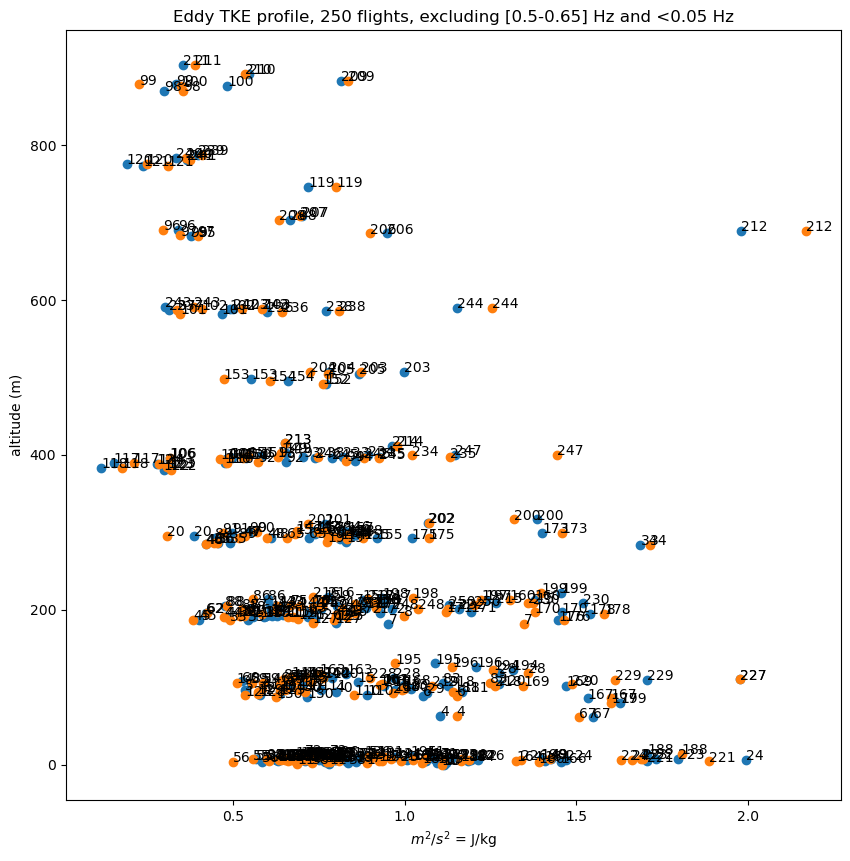

In [176]:
# TKE 
TKE1 = results.ww1 + results.uu1 + results.vv1 
TKE2 = results.ww2 + results.uu2 + results.vv2 

plt.figure( figsize=(10,10) )

plt.scatter( TKE1, results.altitude)
plt.scatter( TKE2, results.altitude)
plt.title('Eddy TKE profile, 250 flights, excluding [0.5-0.65] Hz and <0.05 Hz') 
plt.xlabel('$m^2 / s^2$ = J/kg') 
plt.ylabel('altitude (m)') 

# leg numbers for points
for i, txt in enumerate(results.index):
    plt.annotate(txt+1, (TKE1[i],results.altitude[i]))
    plt.annotate(txt+1, (TKE2[i],results.altitude[i]))

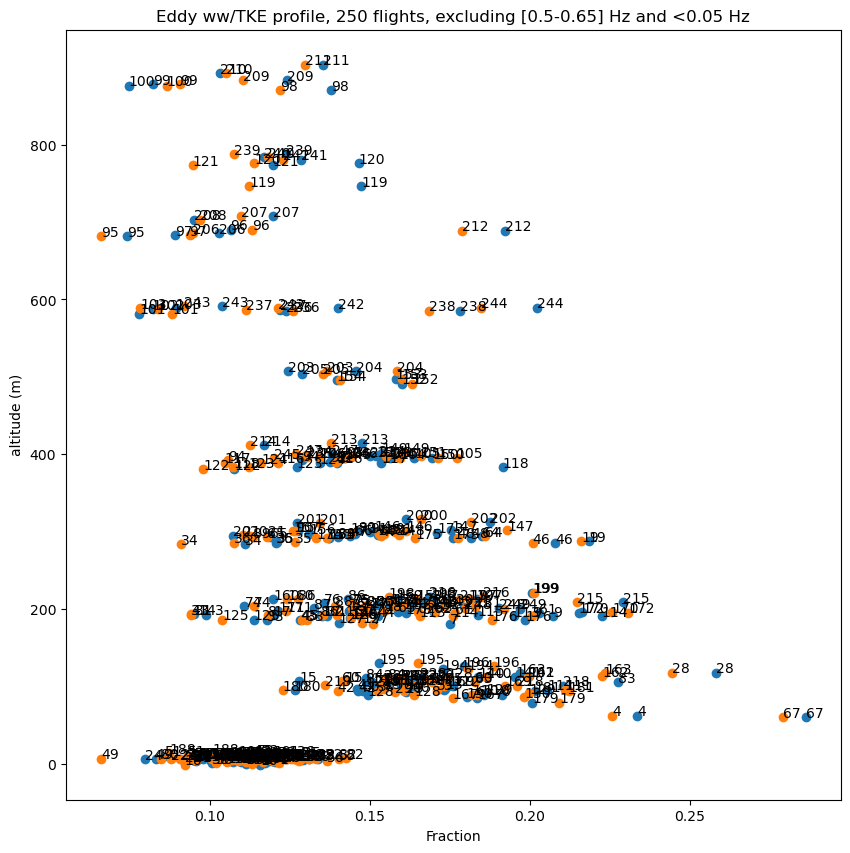

In [172]:
# ww as fraction of TKE 

plt.figure( figsize=(10,10) )

plt.scatter( results.ww1/TKE1, results.altitude)
plt.scatter( results.ww2/TKE2, results.altitude)
plt.title('Eddy ww/TKE profile, 250 flights, excluding [0.5-0.65] Hz and <0.05 Hz') 
plt.xlabel('Fraction') 
plt.ylabel('altitude (m)') 

# leg numbers for points
for i, txt in enumerate(results.index):
    plt.annotate(txt+1, ((results.ww1/TKE1)[i],results.altitude[i]))
    plt.annotate(txt+1, ((results.ww2/TKE2)[i],results.altitude[i]))

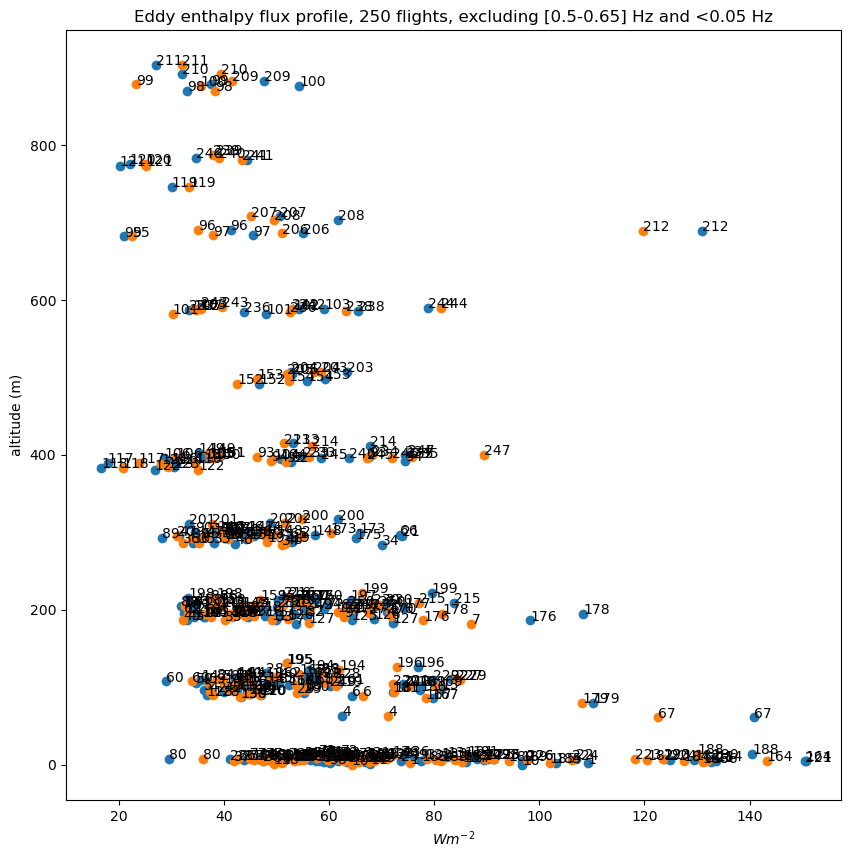

In [179]:
# T flux, converted to heat flux by rho*Cp

rhoCp = 1.2 * 1004  # kgair/m3 times J/kgair/K = J/K/m3 x K m/s --> W/m2

plt.figure( figsize=(10,10) )

plt.scatter(rhoCp* results.wT1, results.altitude)
plt.scatter(rhoCp* results.wT2, results.altitude)
plt.title('Eddy enthalpy flux profile, 250 flights, excluding [0.5-0.65] Hz and <0.05 Hz') 
plt.xlabel('$W m^{-2}$') 
plt.ylabel('altitude (m)') 

# leg numbers for points
for i, txt in enumerate(results.index):
    plt.annotate(txt+1, (rhoCp* results.wT1[i],results.altitude[i]))
    plt.annotate(txt+1, (rhoCp* results.wT2[i],results.altitude[i]))

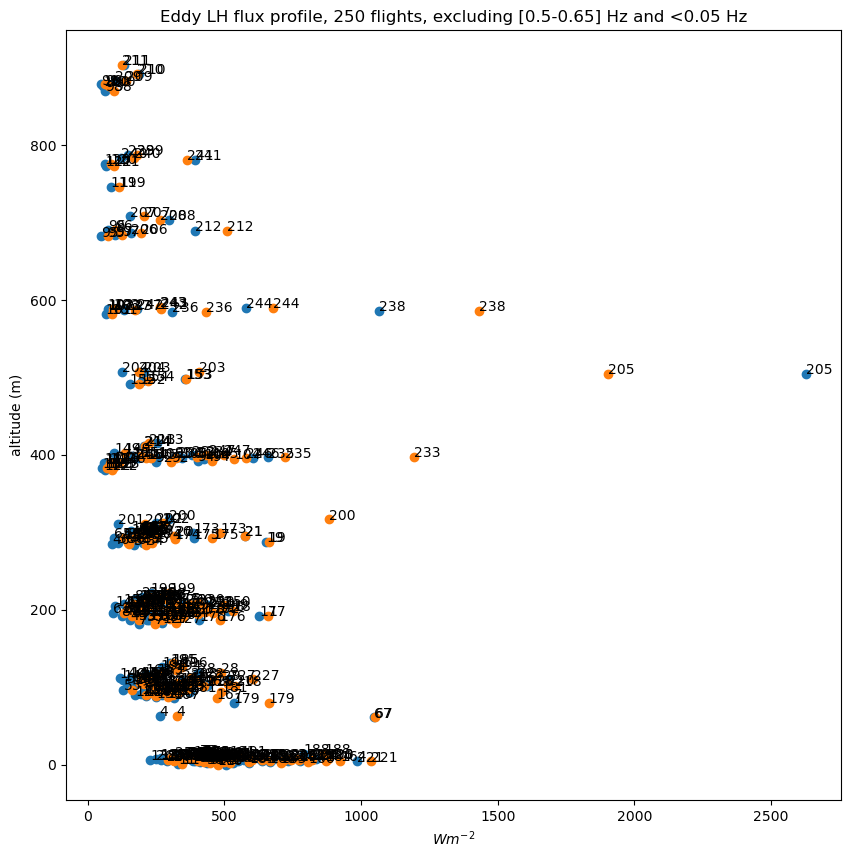

In [182]:
# moisture flux 
# Multiply by rho * L/Cp to get latent heat flux 

rhoL = 1.2 * 2.5e6  # kgair/m3 * J/kgv  = (kgair/kgv) J m-3  *kgv/kgair * m/s --> W m-2

plt.figure( figsize=(10,10) )

plt.scatter(rhoL* results.wq1, results.altitude)
plt.scatter(rhoL* results.wq2, results.altitude)
plt.title('Eddy LH flux profile, 250 flights, excluding [0.5-0.65] Hz and <0.05 Hz') 
plt.xlabel('$W m^{-2}$') 
plt.ylabel('altitude (m)') 

# leg numbers for points
for i, txt in enumerate(results.index):
    plt.annotate(txt+1, (rhoL*results.wq1[i],results.altitude[i]))
    plt.annotate(txt+1, (rhoL*results.wq2[i],results.altitude[i]))

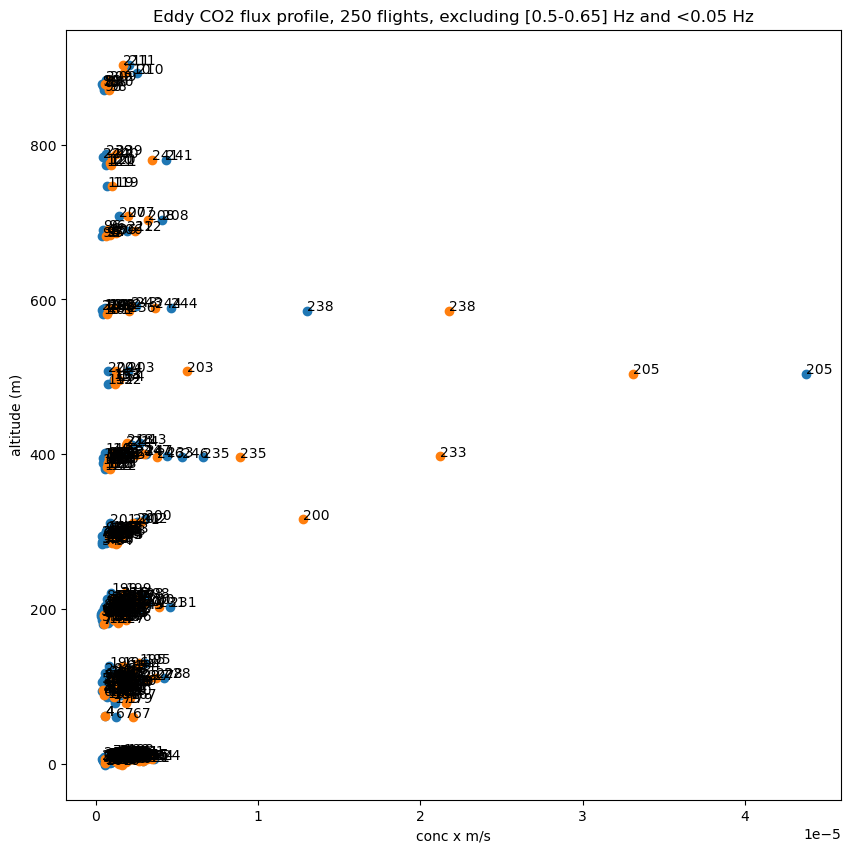

In [173]:
# CO2 flux 

plt.figure( figsize=(10,10) )

plt.scatter( results.wC1, results.altitude)
plt.scatter( results.wC2, results.altitude)
plt.title('Eddy CO2 flux profile, 250 flights, excluding [0.5-0.65] Hz and <0.05 Hz') 
plt.xlabel('conc x m/s') 
plt.ylabel('altitude (m)') 

# leg numbers for points
for i, txt in enumerate(results.index):
    plt.annotate(txt+1, (results.wC1[i],results.altitude[i]))
    plt.annotate(txt+1, (results.wC2[i],results.altitude[i]))

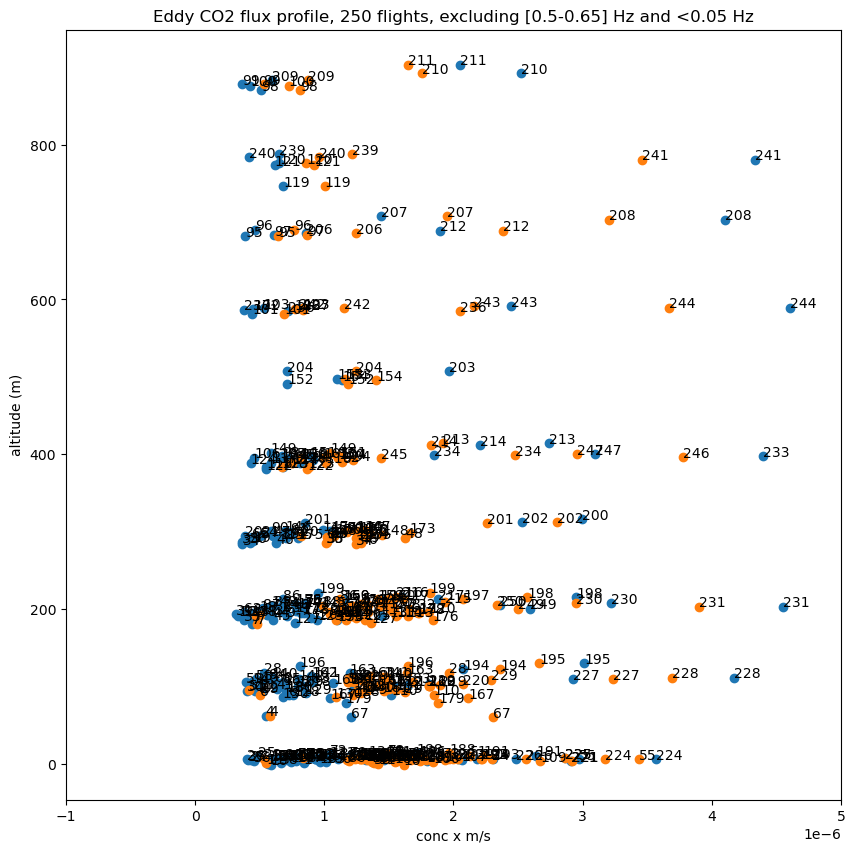

In [175]:
# CO2 flux on expanded scale 

plt.figure( figsize=(10,10) )

plt.scatter( results.wC1, results.altitude)
plt.scatter( results.wC2, results.altitude)
plt.title('Eddy CO2 flux profile, 250 flights, excluding [0.5-0.65] Hz and <0.05 Hz') 
plt.xlabel('conc x m/s') 
plt.ylabel('altitude (m)') 
plt.xlim([-1E-6,0.5E-5])

# leg numbers for points
for i, txt in enumerate(results.index):
    plt.annotate(txt+1, (results.wC1[i],results.altitude[i]))
    plt.annotate(txt+1, (results.wC2[i],results.altitude[i]))

Text(0.5, 1.0, 'line order: blue, orange, green, red')

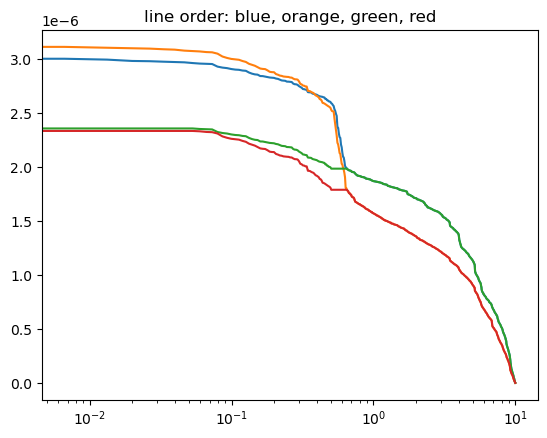

In [163]:
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_C1*spec_w1))) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_C2*spec_w2))) )
        plt.semilogx(np.flip(freq1), np.cumsum( np.flip(abs(spec_C1*spec_w1))*np.flip(cleanmask1)) )
        plt.semilogx(np.flip(freq2), np.cumsum( np.flip(abs(spec_C2*spec_w2))*np.flip(cleanmask2)) )
        plt.title('line order: blue, orange, green, red')

# scratch area for pandas results collector design

### Which frequencies to exclude, in Hz, and how to gather

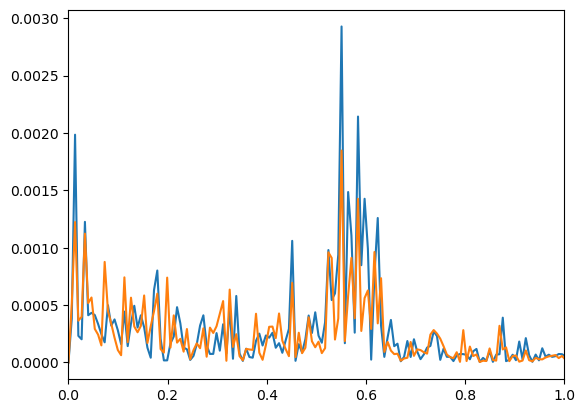

In [71]:
plt.plot(np.flip(freq1), np.flip(abs(spec_T1*spec_w1))); plt.xlim([0,1])
plt.plot(np.flip(freq2), np.flip(abs(spec_T2*spec_w1))); plt.xlim([0,1]);
# Problem is in frequencies 0.5-0.65 Hz, verified on some plots - just clobber them 

In [72]:
# Also drop lowest frequencies, say below 0.05 cycles/sec = 20 second periods 
freq1[0:10]

array([0.        , 0.0066335 , 0.013267  , 0.0199005 , 0.026534  ,
       0.0331675 , 0.039801  , 0.04643449, 0.05306799, 0.05970149])

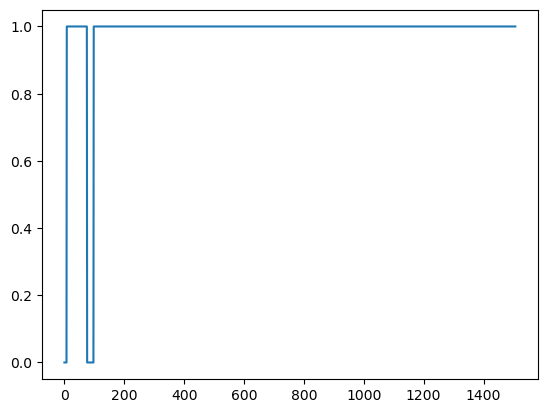

In [88]:
# Set an array to zero where frequency is in the oscillation band 0.5-0.65 Hz 
# or in the steering band <0.05 Hz

osc  = (freq1>0.5) & (freq1<0.65) 
steer= (freq1<0.05)
cleanmask = np.where(osc | steer, 0, 1)

plt.plot(cleanmask)

In [115]:
df = df1.iloc[[0]]
result = df.drop(columns=df.keys().values[6:])
df = df2.iloc[[23]]
result2 = df.drop(columns=df.keys().values[6:])

result2

,Timestamp,latitude,longitude,course,speed,altitude
25,2023-07-10T14:23:14.350,25.558167,-80.139333,306.7,38.531856,205.3


In [120]:
pd.concat([result, result2], ignore_index=True)

,Timestamp,latitude,longitude,course,speed,altitude
0,2023-07-10T14:23:13.150,25.558000,-80.139000,306.5,38.480411,205.7
1,2023-07-10T14:23:14.350,25.558167,-80.139333,306.7,38.531856,205.3
